In [1]:

import numpy as np
import astropy.units as u
from astropy.io import fits
import time
from importlib import reload
import copy

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle

import scoobi
from scoobi.math_module import xp, _scipy, ensure_np_array
from scoobi.imshows import imshow1, imshow2, imshow3

import lina

print(scoobi.__file__)
print(lina.__file__)


/opt/conda/envs/km310env/lib/python3.10/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


/home/kianmilani/Projects/scoob-interface/scoobi/__init__.py
/home/kianmilani/Projects/lina/lina/__init__.py


In [19]:
reload(scoobi)
xc, yc = (4263, 2920)
npsf = 500
scoobi.set_zwo_roi(xc, yc, npsf)

Succesfully initialized testbed interface.


In [ ]:
reload(scoobi)
I = scoobi.SCOOBI(cam_channel='camsci', dm_channel='dm00disp05')
I.zero_dm()

Succesfully initialized testbed interface.


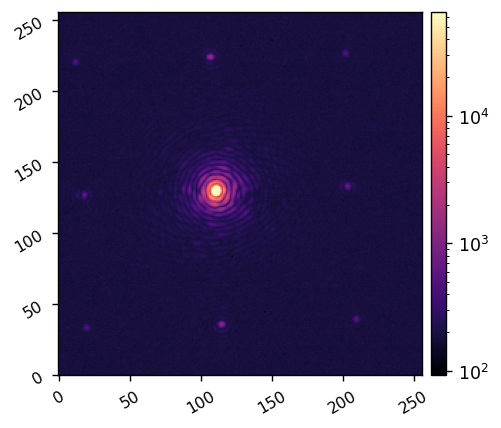

In [ ]:
im = I.snap()
imshow1(im, lognorm=True)

# Do the normalization

In [2]:
scoobi.move_psf(2, 0)

AttributeError: module 'scoobi' has no attribute 'move_psf'

In [39]:
reload(scoobi)
scoobi.set_zwo_exp_time(0.00001)

Succesfully initialized testbed interface.


In [36]:
reload(scoobi)
scoobi.set_fib_atten(10)

Succesfully initialized testbed interface.


KeyError: 'No device fiberatten represented within these properties'

30606.4


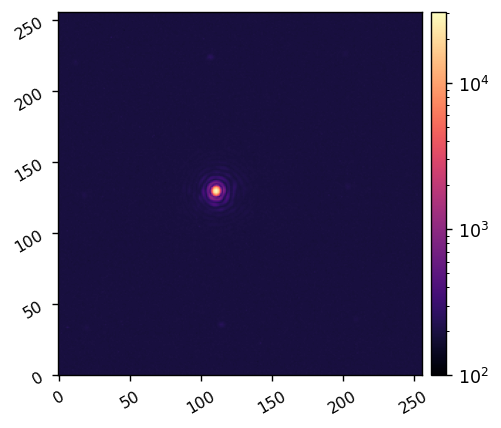

In [ ]:
I.Nframes = 10
ref_psf = I.snap()
print(xp.max(im))
imshow1(im, lognorm=True, vmin=1e2)

In [53]:
reload(scoobi)
scoobi.get_zwo_exp_time()

Succesfully initialized testbed interface.


3.19999999192078e-05

In [89]:
10**((5 - 10)/10) 

0.31622776601683794

In [ ]:
reload(scoobi)
I = scoobi.SCOOBI(cam_channel='scicam', dm_channel='dm00disp05')
I.zero_dm()

Succesfully initialized testbed interface.


In [ ]:
I.Imax_ref = xp.max(ref_psf)
I.att_ref = 10
I.texp_ref = 3.2e-5

In [103]:
scoobi.set_zwo_exp_time(0.005)

In [81]:
scoobi.move_psf(2, 0)

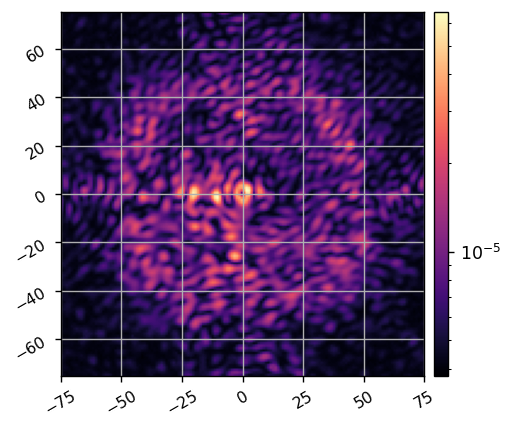

In [ ]:
I.Nframes = 10
I.npsf = 150
I.x_shift = -3
I.y_shift = 0 

I.texp = scoobi.get_zwo_exp_time()
I.att = 0
I.return_ni = True

coro_im = I.snap()
imshow1(coro_im, lognorm=True, pxscl=1, grid=True)

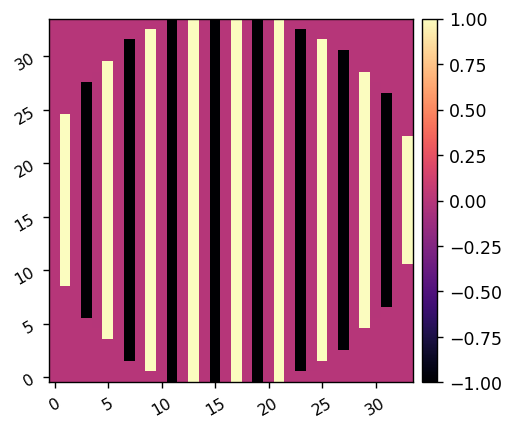

In [ ]:
def create_sin_command(x_cpa=10, y_cpa=10, Nact=34):
    # cpa = cycles per aperture
    # max cpa must be Nact/2
    if x_cpa>Nact/2 or y_cpa>Nact/2:
        raise ValueError('The cycles per aperture is too high for the specified number of actuators.')
    y,x = xp.indices((Nact, Nact)) - Nact//2
    sin_command = xp.cos(2*np.pi*(x_cpa*x + y_cpa*y)/Nact)
    return sin_command

sin_command = create_sin_command(x_cpa=8.5, y_cpa=0) * xp.array(I.dm_mask)
imshow1(sin_command)


In [ ]:
I.zero_dm()

In [ ]:
I.set_dm(5e-9 * sin_command)

In [ ]:
sin_im = I.snap()

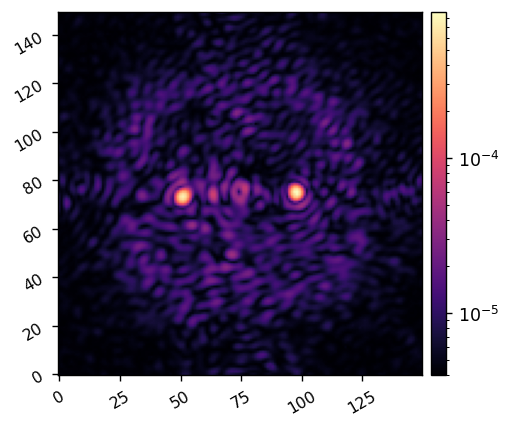

In [108]:
imshow1(sin_im, lognorm=True)

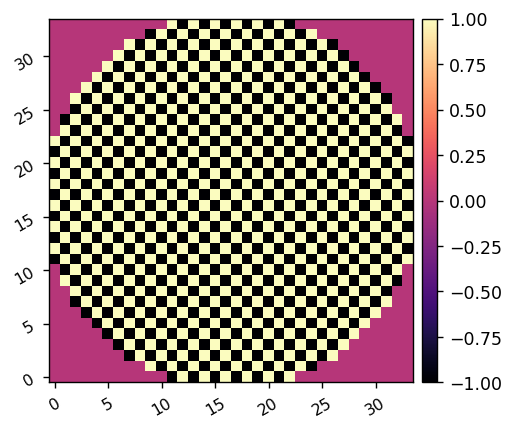

In [ ]:
waffle_command = create_sin_command(x_cpa=17, y_cpa=17) * xp.array(I.dm_mask)
imshow1(waffle_command)

In [ ]:
I.set_dm(10e-9 * waffle_command)

In [ ]:
I.npsf = 150
waffle_im = I.snap()

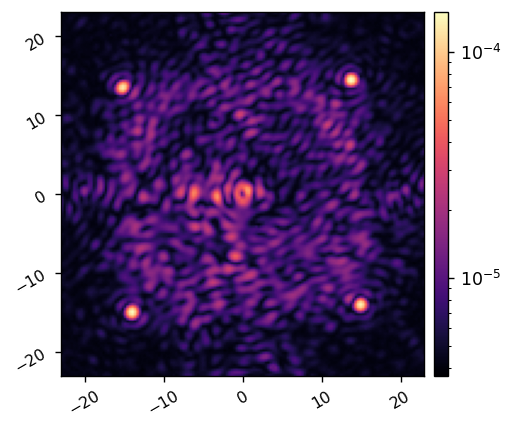

In [ ]:
imshow1(waffle_im, lognorm=True, pxscl=I.psf_pixelscale_lamD)

Centroids:
 [[ 28.75737927  25.71702702]
 [ 24.98455157 118.47658552]
 [119.21811816 121.51408231]
 [123.0050286   28.86204377]
 [ 28.75737927  25.71702702]]


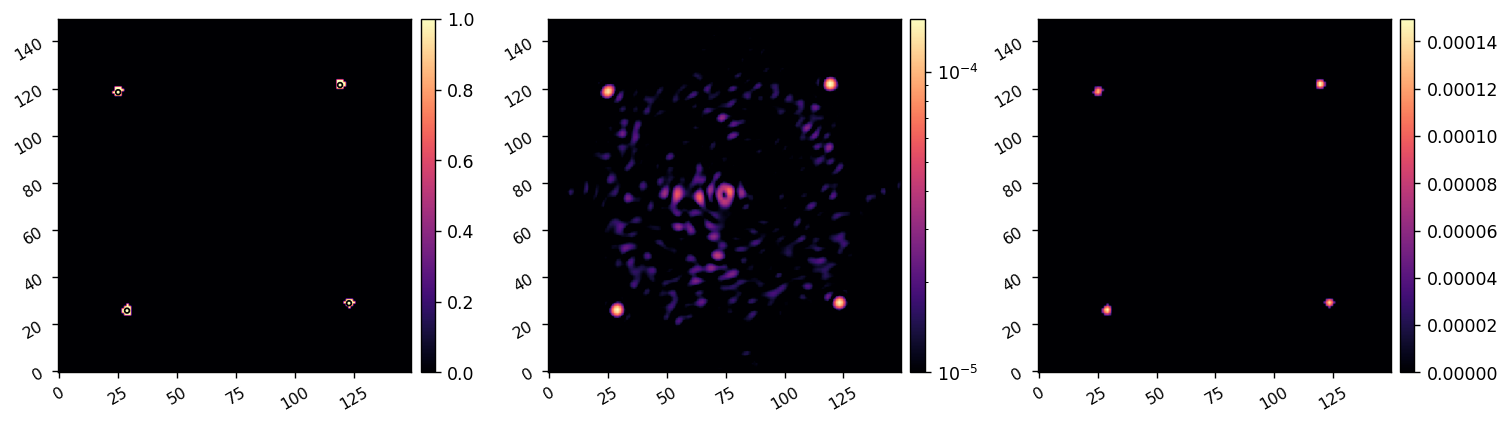

Angle:  87.89322955878923


In [ ]:
angle = utils.measure_center_and_angle(waffle_im, I.psf_pixelscale_lamD, im_thresh=5e-5, r_thresh=15)

In [ ]:
I.zero_dm()